# Python API Demo

You can compose the model and dataset through Python API.

First, import the necessary components from the library.

In [1]:

from vis4d.model.detect.faster_rcnn import FasterRCNN

from vis4d.data.const import CommonKeys as K
from vis4d.vis.image.functional import imshow_bboxes

from vis4d.config import instantiate_classes
from vis4d.zoo.base.datasets.coco import get_coco_detection_cfg

/Users/royyang/anaconda3/envs/vis4d/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Now, let's create the dataset and fetch the image from it.

In [2]:

# Create dataloader for COCO using the default config
dataloader_cfg = get_coco_detection_cfg(
    "data/coco_test/",
    train_split="train",
    test_split="train",
    samples_per_gpu=1,
    workers_per_gpu=0,
    cache_as_binary=False,
)

test_dataloader = instantiate_classes(dataloader_cfg.test_dataloader)[0]
batch = next(iter(test_dataloader))
inputs, images_hw = (
    batch[K.images],
    batch[K.input_hw],
)

Generating COCODataset(root=data/coco_test/, split=train, use_pascal_voc_cats=False) data mapping...
Loading COCODataset(root=data/coco_test/, split=train, use_pascal_voc_cats=False) takes 0.00 seconds.


Next, we can initialize and run the model on it.

In [3]:

faster_rcnn = FasterRCNN(num_classes=80, weights="mmdet")

faster_rcnn.eval()
dets = faster_rcnn(inputs, images_hw, original_hw=images_hw)

Load checkpoint from http path: https://download.pytorch.org/models/resnet50-0676ba61.pth
/Users/royyang/Workspace/vis4d/vis4d/common/ckpt.py:377: UserWarning: The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

  rank_zero_warn(err_msg)
Load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Finally, let's visualize the result.

torch.Size([3, 800, 1248]) torch.Size([52, 4])


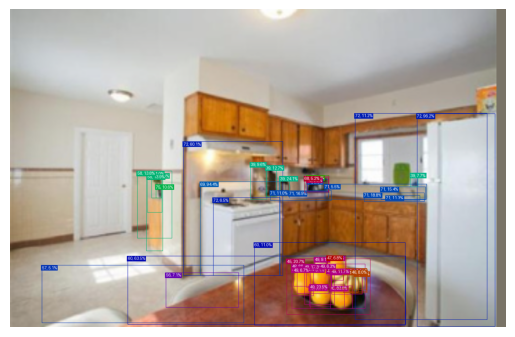

In [4]:
print(inputs[0].shape, dets.boxes[0].shape)
imshow_bboxes(inputs[0], dets.boxes[0], dets.scores[0], dets.class_ids[0])